In [67]:
# plot_predixcan.ipynb
"""""""""""""""""""""""""""""""""
# Author: Keila Velazquez-Arcelay
# 
# Description: Plot the distribution of gene regulation PrediXcan predictions in 3 archaic hominins
#              and 1000 Genomes Project individuals. PrediXcan values published in Colbran et al., 2019.
#
"""""""""""""""""""""""""""""""""


# INPUT DATA
PREDICTIONS = '../data/circadian_genes.tsv'
CIRCADIAN_PRED = '../data/circadian_genes_predixcan_expression.tsv.xz'
CIRCADIAN_PVAL = '../data/raw_predixcan_pvals_circadian_Altai.tsv'
CIRCADIAN_GENES = '../data/circadian_genes.list'
CIRCADIAN_DR = '../data/circadian_genes_predixcan_dr.tsv'
TISSUE_MAP = '../data/gtex_tissue_name_map.tsv'


import pandas as pd
import os
import math
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [68]:
def plot_distribution(df, GeneID, GeneName, Tissue, rows, a_col, h_col, out, figsize):
    sns.set(font_scale = 1.4)
    sns.set_style('white')
    
    # Sort by tissue
    df.sort_values(by='GeneName',inplace=True)
    
    # Create dictionary containing GeneID:[GeneName,Tissue]
    keys = df[GeneID].values.tolist()
    values = df[[GeneName,Tissue]].values.tolist()
    dictionary = dict(zip(keys, values))
    
    archaic_t = df.iloc[:,[a_col,a_col+1,a_col+2]]
    amh_t = df.iloc[:,h_col:]
    
    #  Categorical Data
    b = rows  # number of rows
    a = math.ceil(len(df)/b)  # number of columns. 
    c = 1  # initialize plot counter

    fig = plt.figure(figsize=figsize)

    for i in range(len(df)):
        plt.subplot(a, b, c)

        sns.distplot(df.iloc[i:i+1,h_col:], kde=False, color='black', bins=15)
        #sns.histplot(df.iloc[i:i+1,h_col:], kde=False, color='black', bins=15)
        #sns.displot(df.iloc[i:i+1,h_col:], kde=False, color='black', bins=15)
        plt.axvline(df.iloc[i,a_col], color='#c91f97',lw=5, alpha=1, label='Altai')
        plt.axvline(df.iloc[i,a_col+1], color='#8f59d4',lw=5, alpha=0.8, label='Vindija')
        plt.axvline(df.iloc[i,a_col+2], color='#769bce',lw=5, alpha=0.8, label='Denisova')
        

        plt.title('{}'.format(values[i][0]))
        #plt.title('{}'.format(dictionary[i][0]))
        plt.xlabel('Imputed regulation \n({})'.format(values[i][1]))
        plt.tight_layout()
        
        c = c + 1

    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.8, 0.7))
    #plt.savefig(out, dpi=500, bbox_inches='tight')
    plt.show()


In [69]:
# LOAD DATA
circadian_pred = pd.read_csv(CIRCADIAN_PRED, sep='\t')
circadian_pval = pd.read_csv(CIRCADIAN_PVAL, sep='\t')
circadian_genes = pd.read_csv(CIRCADIAN_GENES, sep='\t')
circadian_dr = pd.read_csv(CIRCADIAN_DR, sep='\t')


In [70]:
# ------------------------------------------------------------------------------------------
# PLOT DIVERGENTLY REGULATED CIRCADIAN GENES

# Extract the circadian genes that are divergently regulated in all 3 archaics
circadian_dr = circadian_dr[circadian_dr.iloc[:,3:].sum(axis=1)==3].iloc[:,:3]

# Add gene regulation predictions in archaic and humans
circadian_dr_pred = pd.merge(circadian_dr,circadian_pred,on=['GeneID','GeneName','GTEx_Tissue'])


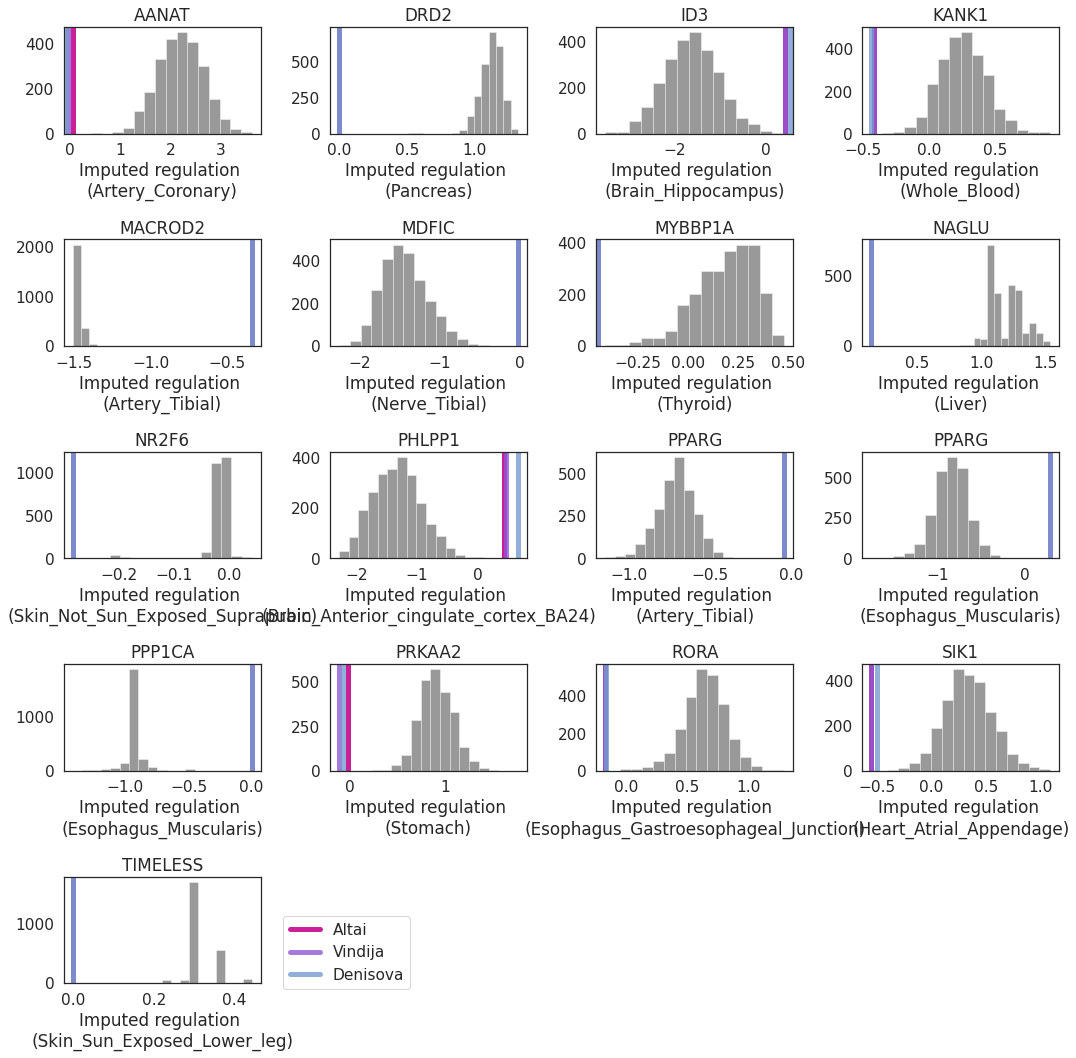

In [71]:
# Plot circadian DR
plot_distribution(circadian_dr_pred,'GeneID','GeneName','GTEx_Tissue',4,3,6,
                  'plots/predixcan_dr_circadian.pdf', (15,15))


In [72]:
# ------------------------------------------------------------------------------------------
# PLOT CLOCK GENES

core_clock = [['ENSG00000133794','BMAL1'], ['ENSG00000134852','CLOCK'], ['ENSG00000008405','CRY1'], 
              ['ENSG00000121671','CRY2'], ['ENSG00000141551','CSNK1D'], ['ENSG00000213923','CSNK1E'], 
              ['ENSG00000105516','DBP'], ['ENSG00000170485','NPAS2'], ['ENSG00000126368','NR1D1'], 
              ['ENSG00000174738','NR1D2'], ['ENSG00000179094','PER1'], ['ENSG00000132326','PER2'], 
              ['ENSG00000049246','PER3'], ['ENSG00000069667','RORA'], ['ENSG00000198963','RORB'], 
              ['ENSG00000143365','RORC']] 
              
clock_ids = [i[0] for i in core_clock]

# Extract core CLOCK predictions
clock_pred = circadian_pred[circadian_pred['GeneID'].isin(clock_ids)]

# Find the tissue with the lowest value for each gene
clock_min = circadian_pval.iloc[:,:2]
clock_min['GTEx_Tissue'] = circadian_pval.iloc[:, 2:].idxmin(axis=1)

# Extract predictions for tissues with minimum p-value
plot_clock = pd.merge(clock_min, clock_pred, on=['GeneID','GeneName','GTEx_Tissue'])


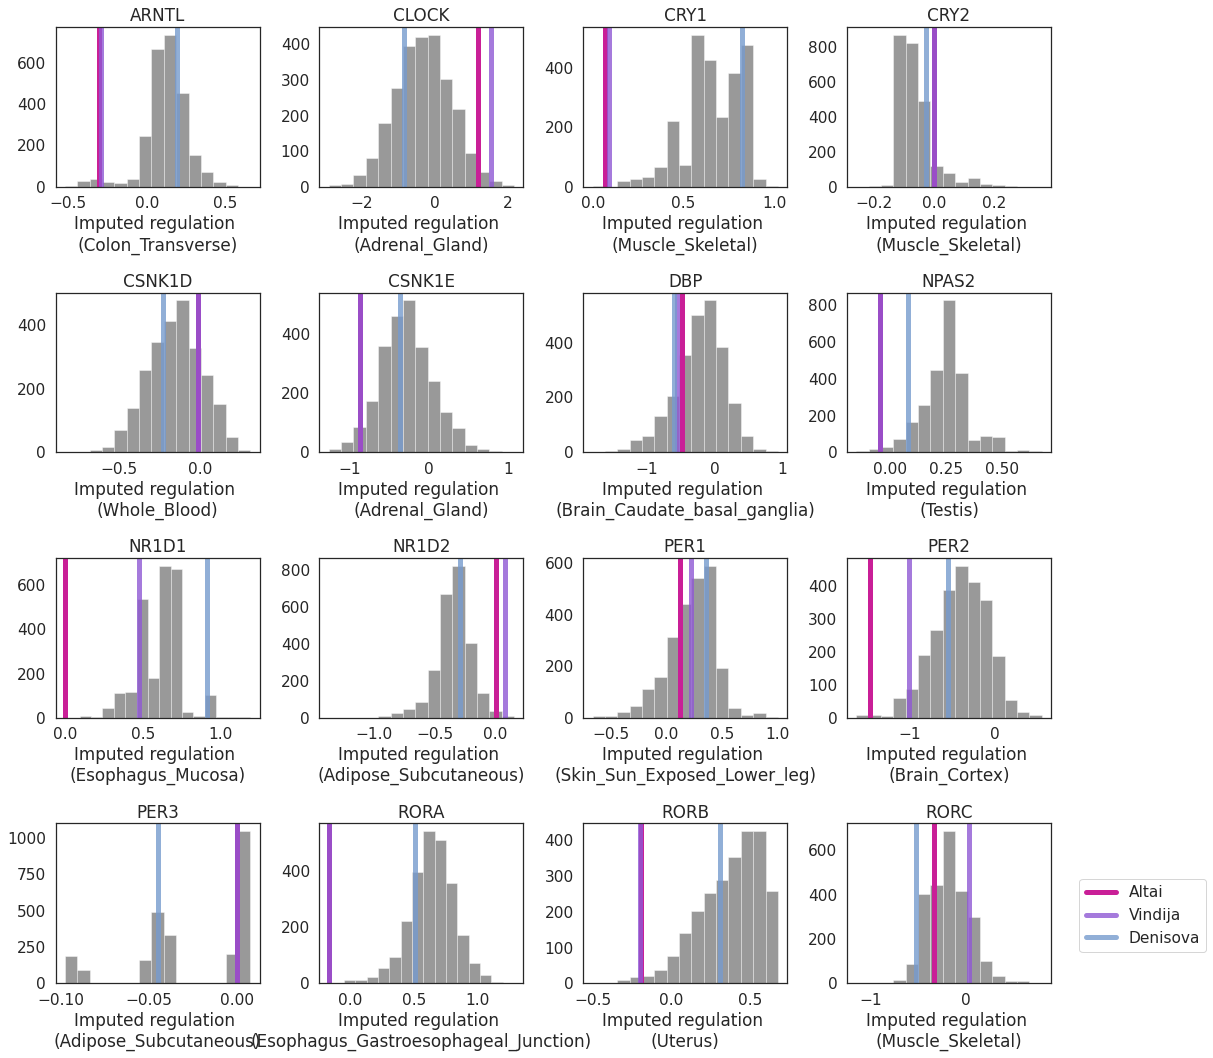

In [74]:
# Plot core CLOCK gene predictions
plot_distribution(plot_clock, 'GeneID','GeneName','GTEx_Tissue',4,4,7, 
                  'plots/predixcan_dr_clock.pdf', (15,15))


In [75]:
# ------------------------------------------------------------------------------------------
# PLOT EXAMPLE CORE CLOCK GENES

example_clock = ['CRY1', 'NPAS2', 'NR1D1', 'PER2', 'RORA']

example_clock_df = plot_clock[plot_clock['GeneName'].isin(example_clock)]


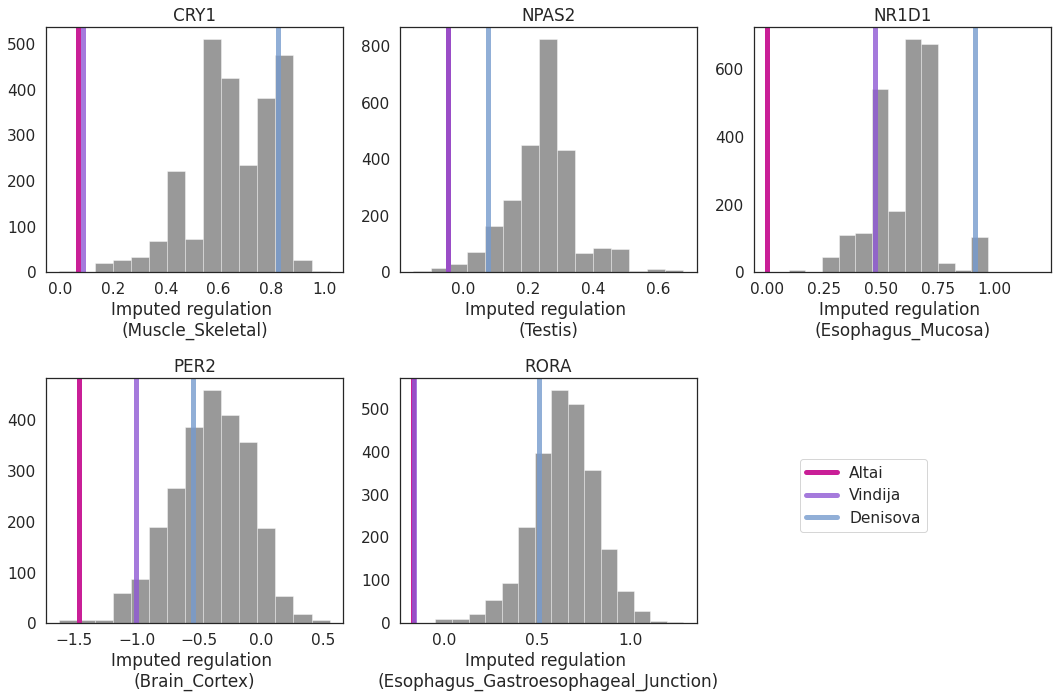

In [76]:
# Plot core Clock genes
plot_distribution(example_clock_df, 'GeneID','GeneName','GTEx_Tissue',3,4,7, 
                  'plots/predixcan_dr_clock_example.pdf', (15,10))
